<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h2>Regression Analysis</h2>
<strong>DAT-5390 | Computational Data Analytics with Python</strong>

Roan G. W. Salgueiro - MBAN2<br>
Hult International Business School<br><br><br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

I built a predictive model using the Apprentice Chef, Inc. dataset from the pre-course assignment. The main objective of the assignment was to develop a model that predicts the continuous response variable, REVENUE. This required me to go through the steps of feature engineering, model preparation, variable selection, and model development.

To successfully complete the task, I utilize the knowledge and skills acquired during the course, especially in data science and machine learning. The goal was to build a model that accurately predicts the revenue generated by Apprentice Chef, Inc. and provides insights that can help the company make data-driven decisions. The completion of this assignment was a crucial step towards becoming proficient in using data to make informed business decisions.

In the following code, my logic is to analyze the data, treat in the dataset all anomalies (such as missing or null values and fill with 0 and correct column names). Then I run the correlation for all the numeric values as X against REVENUE Y to check what are the top correlations. In the next step, I develop new features and run OLS Statsmodels to check if the P-value has a signific statistic difference and check with one that has the most valuable value. Selected the best performance feature, I use the flow of scikit-learn: Instantiate, Fit, Predict, and Score.
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />


<h3>Importing the libraries</h3>
Let's start importing the libraries and import the Apprentice Chef, Inc dataset.



In [89]:
# importing libraries
import pandas as pd # data science essentials
import seaborn as sns # enhanced data visualization
import statsmodels.formula.api as smf # regression modeling
from sklearn.model_selection import train_test_split # train/test split
import sklearn.linear_model # linear modeling in scikit-learn
import statsmodels.api as sm #Library that provides a wide range of statistical tools for data analysis
import statsmodels.formula.api as smf #Library that provides a wide range of statistical tools for data analysis
import numpy as np # Numbers operations
from matplotlib import pyplot as plt # matplotlib

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# specifying the path and file name
file = './Apprentice_Chef_Dataset_2023.xlsx'

# reading the file into Python
chef = pd.read_excel(file)

# checking the file
chef.head(n = 5)

,REVENUE,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED
0,4920.0,Steffon Baratheon,steffon.baratheon@yahoo.com,Steffon,Baratheon,493,9,1,10,265.6,5,5,2,0,0,137.41,6,2.894737,456
1,6150.0,Harlon Greyjoy,harlon.greyjoy@visa.com,Harlon,Greyjoy,361,9,1,6,247.0,2,5,1,0,0,120.20,5,2.631579,680
2,3435.0,Monster,monster@protonmail.com,Monster,Monster,278,6,1,4,164.4,0,6,1,5,0,127.00,3,3.684211,145
3,3330.0,Damon Lannister (lord),damon.lannister.(lord)@yahoo.com,Damon,Lannister,269,8,1,2,176.0,5,5,2,0,0,129.78,6,3.157895,418
4,3427.5,Raynald Westerling,raynald.westerling@jnj.com,Raynald,Westerling,276,7,1,10,164.6,0,6,1,14,0,34.42,3,3.157895,174


<h3>Analyze the data, and treat in the dataset all anomalies</h3>

After I imported the libraries and the dataset, I checked the quality of the data and search for null values using the function chef .isnull().sum(). Only the FAMILY_NAME had 46 Null Values. To avoid any possible problems, I run a For Loop to check any null values and fill it with the number zero (0). 

The column LATE_DELIVERIES has a blank space after the name. It leads to some issues later on in the code. To fix it, I used the basic rename.

To test better performance, I'll divide into three dummy variables the e-mails  professional, personal, and junk using the requisites from the software dictionary


In [90]:
#chef.isnull().sum()
# finding the null value and fill in 0 
for col in chef:
    fill = 0
    if chef[col].isnull().astype(int).sum() > 0:
        chef[col] = chef[col].fillna(fill)

#Rename the Late Deliveries(Has a blank space that shoulnd be there)
chef.rename(columns={'LATE_DELIVERIES ':'LATE_DELIVERIES'}, inplace=True)

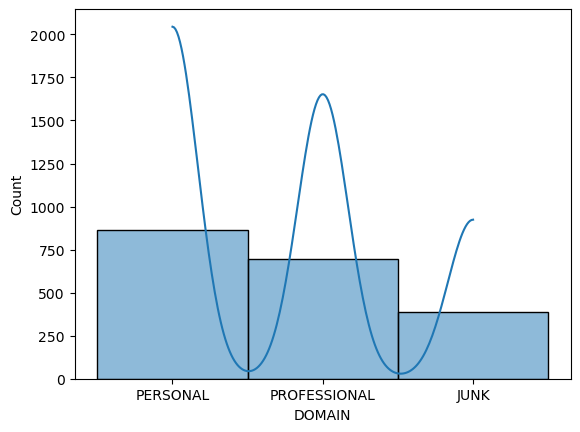

In [91]:
#Remove e-mail name and transfer to domain name
chef['DOMAIN'] = chef['EMAIL'].str.split('@').str[1]

#List of professional Domains
professional =     ['mmm.com' , 'amex.com' , 'apple.com' , 'boeing.com' , 'caterpillar.com', 
                    'chevron.com' , 'cisco.com' , 'cocacola.com' , 'disney.com' , 'dupont.com', 
                    'exxon.com' , 'ge.org' , 'goldmansacs.com' , 'homedepot.com' , 'ibm.com',
                    'intel.com' , 'jnj.com' , 'jpmorgan.com' , 'mcdonalds.com' , 'merck.com ',
                    'microsoft.com' , 'nike.com' , 'pfizer.com' , 'pg.com' , 'travelers.com',
                    'unitedtech.com' , 'unitedhealth.com' , 'verizon.com' , 'visa.com',
                    'walmart.com', 'merck.com']
#List of personal Domains
personal =         ['gmail.com' , 'yahoo.com' , 'protonmail.com']

#List of junk Domains
junk =             ['me.com' , 'aol.com' , 'hotmail.com','live.com', 'msn.com', 'passport.com']

#Find and replace the values
chef['DOMAIN'] = chef['DOMAIN'].replace(professional,'PROFESSIONAL')
chef['DOMAIN'] = chef['DOMAIN'].replace(personal,'PERSONAL')
chef['DOMAIN'] = chef['DOMAIN'].replace(junk,'JUNK')

#Generate the Dummies variable
chef = pd.concat([chef, pd.get_dummies(chef['DOMAIN'])], axis=1)

# displaying the plot for E-mail Quantities
sns.histplot(x = 'DOMAIN',
            data = chef,
            kde = True)
plt.show()


<h3>Correlation </h3>

In a linear regression model, it is important to identify the features that have a strong correlation with the target variable (in this case, REVENUE) as they have a significant impact on the model's performance. To understand and identify the features correlating with REVENUE, I set up the correlation between all the features and the target variable REVENUE, and then sort the features based on their correlation coefficient. The correlation coefficient ranges from -1 to 1, with a value of 1 indicating a perfect positive correlation and a value of -1 indicating a perfect negative correlation.

<i>(Python Machine Learning Linear Regression, 2022)</i>


To print the correlation matrix as a heatmap, I used the heatmap() function from the seaborn library. The heatmap allows me to visualize the correlation between the features and the target variable. The heatmap color-codes I used as "BrBG", with higher values shown in darker colors and lower values in lighter colors. In this case, I used the plot in the vertical to ease reading/analyses.


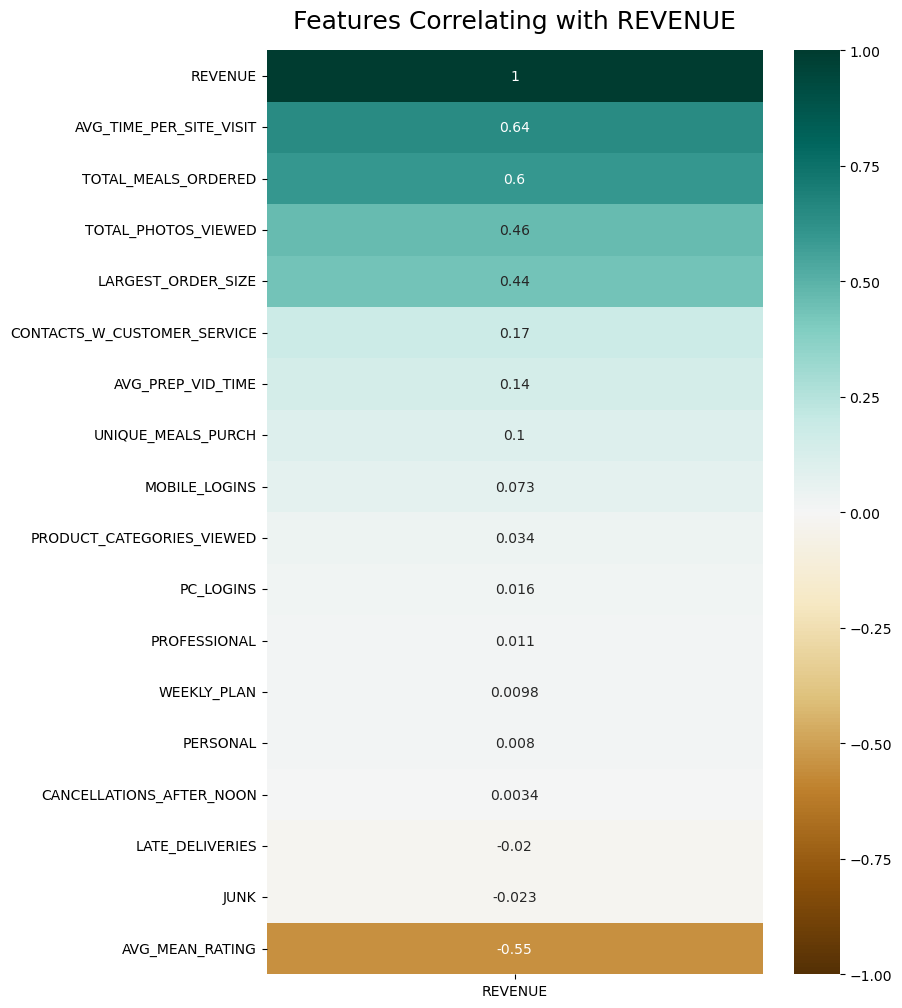

In [92]:
#Size of the plot
plt.figure(figsize=(8, 12))
#Define the options and colors
heatmap = sns.heatmap(chef.corr()[['REVENUE']].sort_values(by='REVENUE', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
#Set the title
heatmap.set_title('Features Correlating with REVENUE', fontdict={'fontsize':18}, pad=16);
#Show the Heatmap
plt.show()

<h3>Outlier Detection with Standard Deviation</h3>

After checking the strongest correlation towards the target variable, I plot the most relevant graphs and I use Outlier Detection with Standard Deviation to improve the model result.

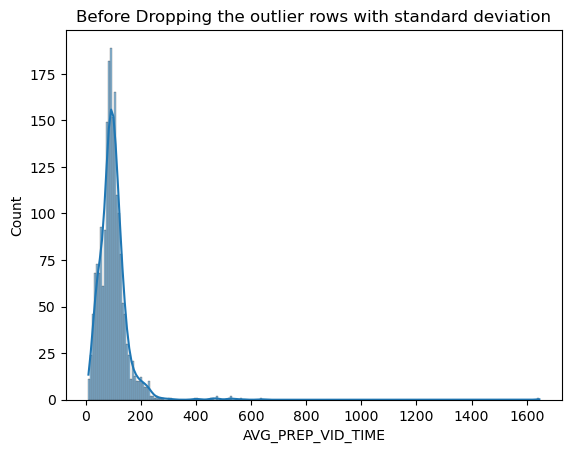

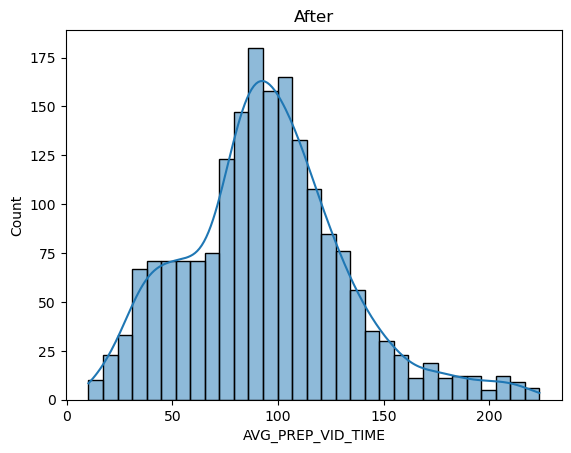

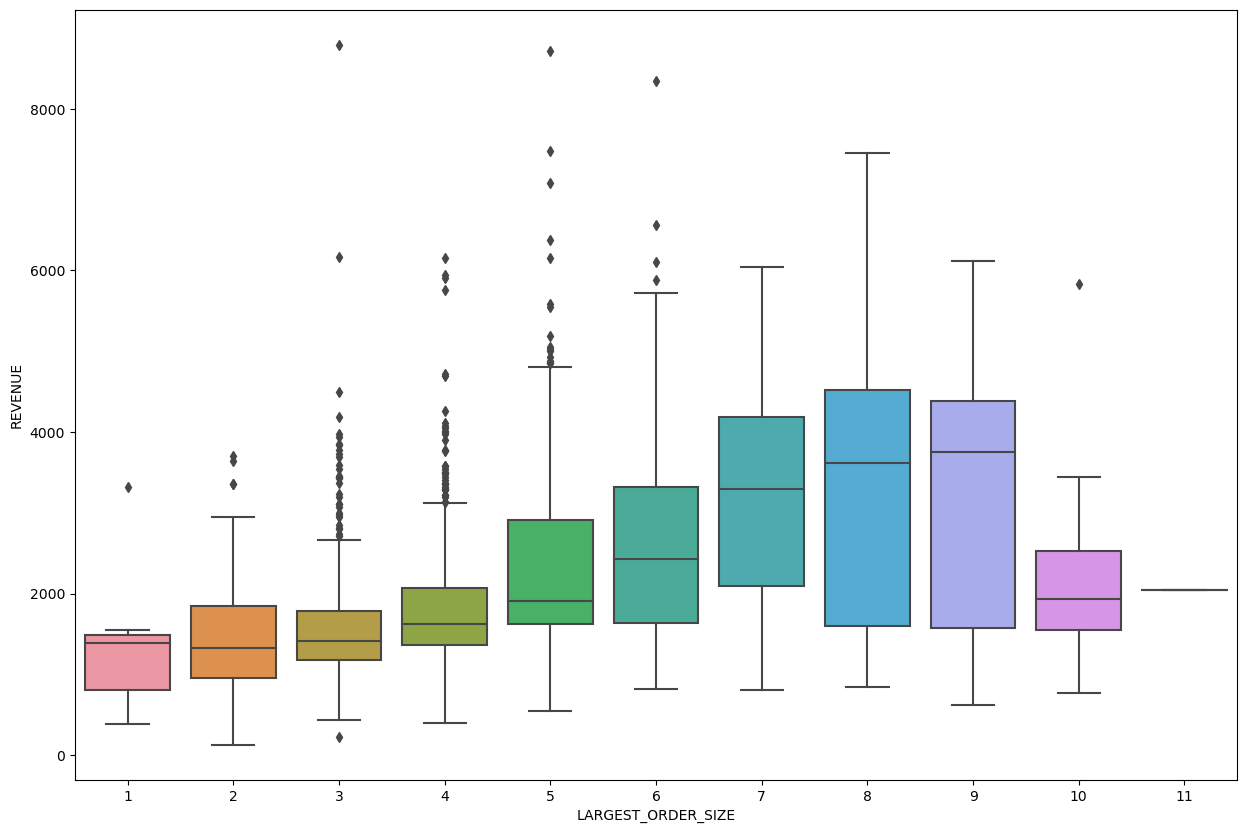

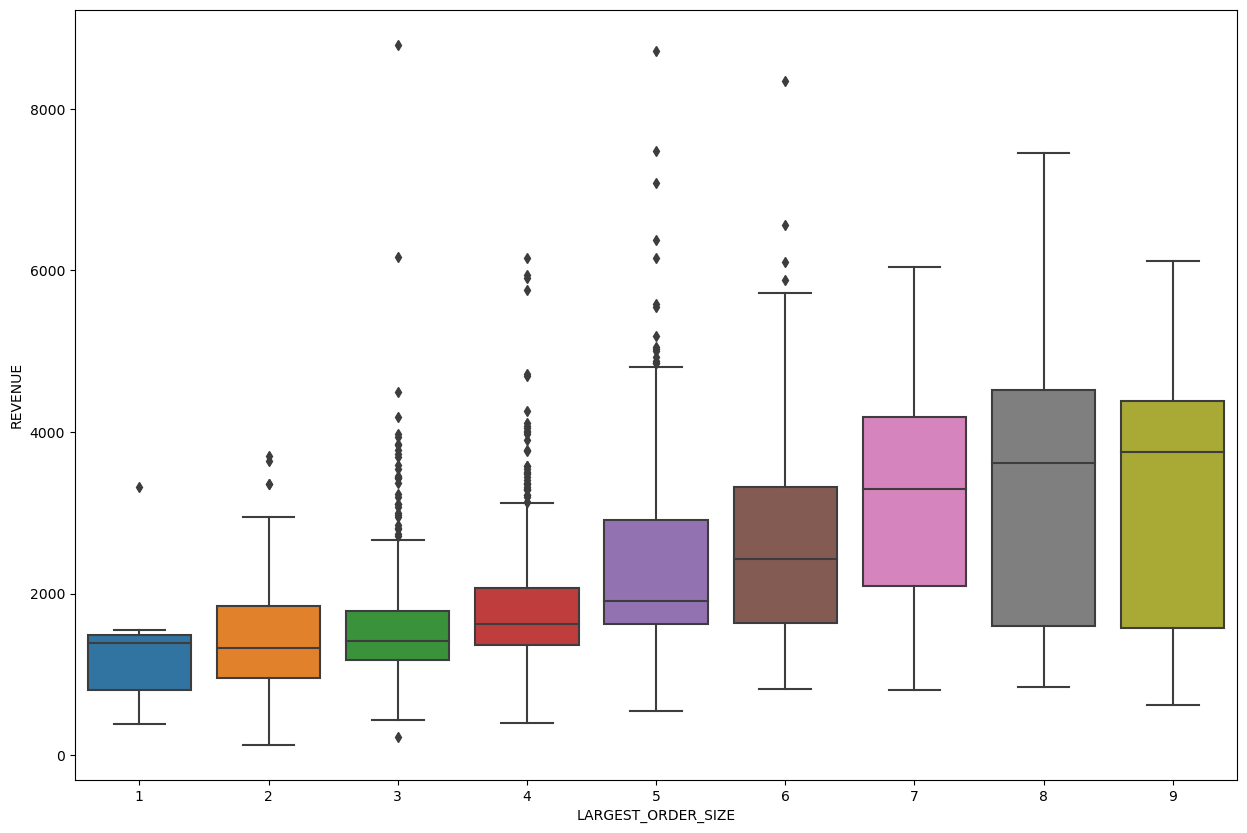

In [93]:
##############################
df_dropped = chef.dropna()
# displaying the plot for 'AVG_PREP_VID_TIME'
sns.histplot(x = 'AVG_PREP_VID_TIME',
            data = df_dropped,
            kde = True).set(title='Before Dropping the outlier rows with standard deviation')
plt.show()

#Dropping the outlier rows with standard deviation
factor = 2 #Value 2 fits better in this colum
variable = 'AVG_PREP_VID_TIME'
upper_lim = chef[variable].mean () + chef[variable].std () * factor
lower_lim = chef[variable].mean () - chef[variable].std () * factor
chef = chef[(chef[variable] < upper_lim) & (chef[variable] > lower_lim)]

##############################
df_dropped = chef.dropna()
# displaying the plot for 'AVG_PREP_VID_TIME'
sns.histplot(x = 'AVG_PREP_VID_TIME',
            data = df_dropped,
            kde = True).set(title='After')
plt.show()

##############################
# setting figure size
fig, ax = plt.subplots(figsize = (15, 10))
# developing a boxplot
sns.boxplot(x    = 'LARGEST_ORDER_SIZE',
            y    = 'REVENUE',
            data = chef)
# displaying the plot
plt.tight_layout
plt.show()


#Dropping the outlier rows with standard deviation
factor = 3 #Value 3 fits better in this colum
variable = 'LARGEST_ORDER_SIZE'
upper_lim = chef[variable].mean () + chef[variable].std () * factor
lower_lim = chef[variable].mean () - chef[variable].std () * factor
chef = chef[(chef[variable] < upper_lim) & (chef[variable] > lower_lim)]

##############################
# setting figure size
fig, ax = plt.subplots(figsize = (15, 10))

# developing a boxplot
sns.boxplot(x    = 'LARGEST_ORDER_SIZE',
            y    = 'REVENUE',
            data = chef)
# displaying the plot
plt.tight_layout
plt.show()


<h3>Strongest correlations analyses</h3> 

I notice the columns AVG_TIME_SITE_VISIT and TOTAL_MEALS_ORDERED have a strong correlation towards REVENUE. Analyzing the relationship between features and the target variable can help us understand the data and select the most informative features for the model. By identifying strong correlations, I can engineer new features and improve the performance of the model.

Starting by visualizing the relationship between the features and the target variable, I used scatter plots. Scatter plots allow to see the distribution of the data points and identify any patterns or trends. I created a scatter plot with AVG_TIME_SITE_VISIT on the x-axis, REVENUE on the y-axis, and color-coded (hue) by TOTAL_MEALS_ORDERED. This plot can help us see if there is any interaction effect between these two features.

In [94]:
chef['AVG_TIME_PER_SITE_VISIT'].describe()

count    1897.000000
mean      149.160200
std        47.056437
min        33.400000
25%       114.300000
50%       145.500000
75%       172.800000
max       447.600000
Name: AVG_TIME_PER_SITE_VISIT, dtype: float64

In [95]:
chef['TOTAL_MEALS_ORDERED'].describe()

count    1897.000000
mean       74.357406
std        54.789199
min        11.000000
25%        39.000000
50%        60.000000
75%        95.000000
max       493.000000
Name: TOTAL_MEALS_ORDERED, dtype: float64

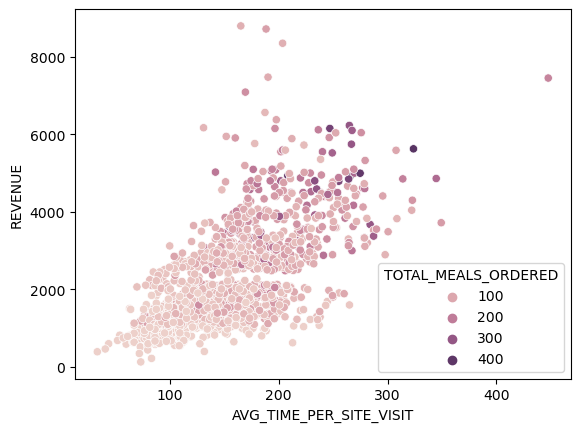

In [96]:
# create a scatter plot with hue points by total meals ordered
x1=chef['AVG_TIME_PER_SITE_VISIT']
y1=chef['REVENUE']
x2=chef['TOTAL_MEALS_ORDERED']

sns.scatterplot(x=x1, y=y1, hue=x2, data=chef)
# Show
plt.show()

<h3>Heatmap to verify what are the strongest correlation </h3>

Using the heatmap again to check the new features results. To plot the correlation matrix as a heatmap, I used again the heatmap() function. The heatmap allows us to visualize the correlation between the highest correlations to the target variable. After the Analysis, the TOTAL_PRODUCTS has a 0.07 more strong correlation to REVENUE than TOTAL_VIEWS

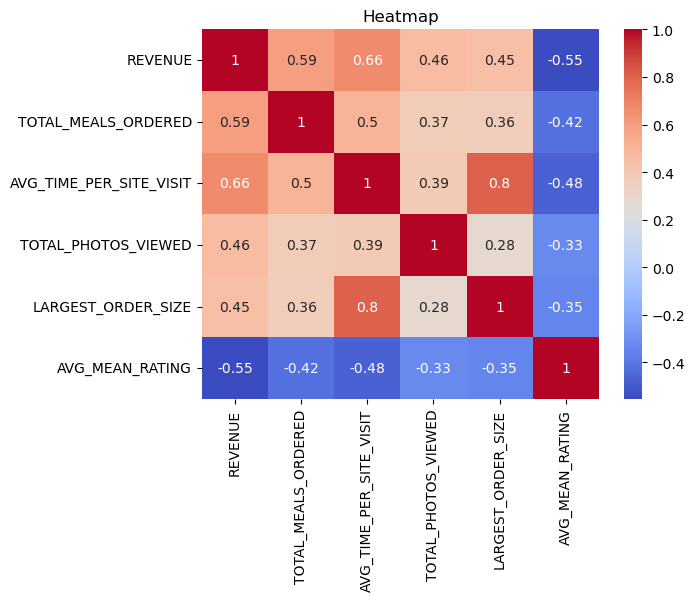

In [104]:
df_corr = chef.corr().round(2)

# printing (Pearson) correlations with REVENUE
df_corr.loc[ [
               'TOTAL_MEALS_ORDERED' , 
               'AVG_TIME_PER_SITE_VISIT' ,
               'TOTAL_PHOTOS_VIEWED', 
               'LARGEST_ORDER_SIZE', 
               'AVG_MEAN_RATING', 
] , 
             ['REVENUE'] ].sort_values(by = 'REVENUE', ascending = False)

features = chef.loc[:,['REVENUE',               
               'TOTAL_MEALS_ORDERED' , 
               'AVG_TIME_PER_SITE_VISIT' ,
               'TOTAL_PHOTOS_VIEWED', 
               'LARGEST_ORDER_SIZE', 
               'AVG_MEAN_RATING']]

# conducting the correlation analysis
features_cor = features.corr(method = 'pearson')

# developing a coolwarm heatmap
sns.heatmap(data = features_cor,
            cmap ='coolwarm',
            annot = True,
            linecolor = 'black')
# setting the title 
plt.title(label = "Heatmap")
# showing the plot 
plt.show(block = True)

<h3>Hypothesize on Features to Engineer</h3>

Before creating new features, it is important to have a hypothesis of how they may impact the target variable REVENUE. In the Chef dataset, I have some hypotheses on features to engineer for the given columns:

 - For 'LOG_TOTAL_MEALS_ORDERED', 'LOG_UNIQUE_MEALS_PURCH', and 'LARGEST_ORDER_SIZE', the total number of meals          ordered, unique meals purchased, and largest order size could be added to the feature.

 - For 'LOG_CONTACTS_W_CUSTOMER_SERVICE', the average time per customer service contact could be added to the feature.

 - For 'PRODUCT_CATEGORIES_VIEWED', the number of times each product category was viewed could be added to the            feature.

 - For 'LOG_AVG_TIME_PER_SITE_VISIT', the total time spent on the website could be added to the feature.

 - For 'LOG_TOTAL_PHOTOS_VIEWED', the number of times each photo was viewed could be added to the feature.

 - For 'LOGIN', the number of logins made by each customer could be added to the feature.
 
 - For 'LOG_AVG_MEAN_RATING', the average rating given by the customer could be added to the feature.

 - For 'JUNK', 'PERSONAL', and 'PROFESSIONAL', dummy variables could be created to represent the customer's email        domain. The values of 1 and 0 for the "JUNK", "PERSONAL" and "PROFESSIONAL" categories.

To test these hypotheses, I'll engineer the new features and add them to the existing dataset. Then I'll train the model with both the original and new features and compare the model's performance with and without the new features. If the model's performance improves with the new features, it suggests that my hypothesis was correct, and the new features capture important information that was not captured by the original features. 


In [98]:
# feature  enginerring 
chef['LOG_TOTAL_MEALS_ORDERED'] = np.log(chef['TOTAL_MEALS_ORDERED'] )
chef['LOG_AVG_TIME_PER_SITE_VISIT'] = np.log(chef['AVG_TIME_PER_SITE_VISIT'] )
chef['LOG_TOTAL_PHOTOS_VIEWED'] = np.log(chef['TOTAL_PHOTOS_VIEWED'] )
chef['LOG_CONTACTS_W_CUSTOMER_SERVICE'] = np.log(chef['CONTACTS_W_CUSTOMER_SERVICE'] )
chef['LOG_UNIQUE_MEALS_PURCH'] = np.log(chef['UNIQUE_MEALS_PURCH'] )
chef['LOG_AVG_MEAN_RATING'] = np.log(chef['AVG_MEAN_RATING']) 
chef['LOG_PC_LOGINS'] = np.log(chef['PC_LOGINS'] )
chef['LOGIN'] = chef['MOBILE_LOGINS'] + chef['LOG_PC_LOGINS'] 


x_var_log = [  'LOG_TOTAL_MEALS_ORDERED' , 
               'LOG_UNIQUE_MEALS_PURCH',
               'LOG_CONTACTS_W_CUSTOMER_SERVICE', 
               'PRODUCT_CATEGORIES_VIEWED',
               'LOG_AVG_TIME_PER_SITE_VISIT' ,
               'LOG_TOTAL_PHOTOS_VIEWED', 
               'LOGIN' ,
               'LARGEST_ORDER_SIZE', 
               'LOG_AVG_MEAN_RATING', 
               'JUNK', 
               'PERSONAL', 
               'PROFESSIONAL'
            ]

#ylog
chef['LOG_REVENUE'] = np.log(chef['REVENUE'] )


<h3>Double check the p-value and R-squared</h3>

The statsmodels package in a linear regression model is able to obtain statistics such as the p-value and R-squared to evaluate the quality of the model. Using the sm.OLS function to fit a linear regression to the features and I can obtain statistical summaries of the model.

<strong>P-value</strong>

The p-value is a measure of statistical significance that indicates whether the relationship between the independent variables (features) and the dependent variable (target) is statistically significant or not. If the p-value is less than the chosen significance level (0.05), we can reject the null hypothesis that there is no relationship between the variables and conclude that there is a significant relationship.

<strong>R-squared</strong>

The R-squared value is a measure of how well the linear regression model fits the data. It ranges from 0 to 1, where a value of 1 indicates a perfect fit and a value of 0 indicates that the model does not explain any of the variability in the data. R-squared can be used to compare different models and choose the best one based on how well it fits the data.

<i>(Python Programming Tutorials 2021)</i>

The sm.ols function was used to fit a linear regression model to data and obtain statistical summaries such as the p-value and R-squared to evaluate the quality of the model and determine the relationship between the features to the target is significant 'REVENUE'.



In [105]:
# Create a linear regression object with OLS function to compare features to REVENUE
X = sm.add_constant(chef[x_var_log])
y = chef['LOG_REVENUE']
model = sm.OLS(y, X)

# Fit the model on the data
results = model.fit()

# Print model summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            LOG_REVENUE   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     365.5
Date:                Tue, 14 Feb 2023   Prob (F-statistic):               0.00
Time:                        00:46:33   Log-Likelihood:                -238.05
No. Observations:                1897   AIC:                             500.1
Df Residuals:                    1885   BIC:                             566.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

<h3>OLS linear regression model results</h3>

After comparing both outputs, TOTAL_VIEWS and TOTAL_PRODUCTS have P>|t| p-value less than 0.05. That means that the features have significant statistical differences. The R-squared reach good performance(0.681). I'll use this feature to build a model that accurately predicts the revenue


<h3>Train-Test Split</h3>

Set up the train-test split in the cell below. I'll set the test_size to 0.25 and your random_state to 219 as requested for this assignment.

In [100]:
# Preparing a DataFrame based the the analysis above TOTAL_PRODUCTS
x_data = chef.loc[ : , x_var_log]

# preparing response variable REVENUE
y_data      = chef.loc[ : , 'REVENUE']
log_y_data  = chef.loc[ : , 'LOG_REVENUE']

# setting up train-test split 
x_train, x_test, y_train, y_test = train_test_split(
            x_data, 
            log_y_data, #y_data, 
            test_size    = 0.25,
            random_state = 219)

<h3>Linear Regression </h3>

The Linear Regression was important because it provides a simple and efficient way to create a linear regression model. The following function uses the features to fit a line to the data and make predictions in the dataset. It also provides useful features such as the ability to perform cross-validation and regularization, which can improve the performance of the model.

In [101]:
# Setting a model name
model_name = "Linear Regression"

# INSTANTIATING a model object 
model = sklearn.linear_model.LinearRegression()

# FITTING to the training data
model_fit = model.fit(x_train, y_train)

# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

Training Score : 0.6686
Testing Score  : 0.7052
Train-Test Gap : 0.0366


<h3>Extracting Coefficients</h3>

In [102]:
# zipping each feature name to its coefficient
model_coefficients = zip(x_train.columns,
                         model.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
coefficient_lst = [('intercept', model.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for coefficient in model_coefficients:
    coefficient_lst.append(coefficient)
    

# checking the results
for pair in coefficient_lst:
    print(pair)

('intercept', 3.4)
('LOG_TOTAL_MEALS_ORDERED', 0.27)
('LOG_UNIQUE_MEALS_PURCH', 0.13)
('LOG_CONTACTS_W_CUSTOMER_SERVICE', 0.08)
('PRODUCT_CATEGORIES_VIEWED', 0.0)
('LOG_AVG_TIME_PER_SITE_VISIT', 0.66)
('LOG_TOTAL_PHOTOS_VIEWED', 0.03)
('LOGIN', 0.02)
('LARGEST_ORDER_SIZE', -0.05)
('LOG_AVG_MEAN_RATING', -0.46)
('JUNK', -0.01)
('PERSONAL', 0.01)
('PROFESSIONAL', 0.0)


<h3>Storing Results</h3>

In [103]:
# dynamically printing results
Linear_model =  f"""\
Model Name:     {model_name}
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap} """

# The results are outputted as a dynamic string
# This is the last thing that Jupyter Notebook output
print(Linear_model)

Model Name:     Linear Regression
Train_Score:    0.6686
Test_Score:     0.7052
Train-Test Gap: 0.0366 


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h3>Conclusion</h3>

Based on my analysis, I have successfully built a linear regression model that accurately predicts the revenue generated by Apprentice Chef, Inc using 12 engineered features. The Train-Test Gap value of 0.0366 indicates that the model generalizes well and is not overfitting to the training data.

The model shows that there is a positive and statistically significant relationship between the features and the target variable REVENUE, this confirms the hypothesis. Also, the model explains approximately 70% of the variability in the data, as indicated by the R-Square on the Test Set of 0.7052.

In conclusion, the linear regression model with the features provides a useful tool for Apprentice Chef, Inc to predict revenue and identify which customers are likely to generate more revenue for the company.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<strong>References</strong>

<i>Python Machine Learning Linear Regression. (2022). https://www.w3schools.com/python/python_ml_linear_regression.asp</i>

<i>Python Programming Tutorials. (2021). https://pythonprogramming.net/how-to-program-r-squared-machine-learning-tutorial/ </i>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<i>All criteria requirements were achieved:</i>

<i>1) Train-Test Gap: The gap between training and testing scores is less than or equal to 0.05 OK.  random_state=21 | test_size =0.25 OK</i>

<i>2) Response Variable Usage: The response variable cannot be used in any form as an explanatory variable OK</i>

<i>3) Model Types: statsmodels or sklearn.linearmodel was used  OK</i>

<i>4) No Errors, Code Comments, and Markdown(~1500 words) OK</i>

<i>5) Code Processing Time: Less than 60 seconds OK</i>

<i>6) Model results are outputted as a dynamic string at the end of your script OK</i>

<i>7) X-Variable Usage: NO original and logarithmic in the same model OK. No exponential OK</i>

<i>8) Full Dataset Usage:  Not modify any observations from the original dataset OK</i>


